### Mushroom Dataset Classification using Logistic Regression

#### Importing Necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

#### Reading the Datasets

In [3]:
df_primarydata = pd.read_csv("primary_data.csv", sep = ';')
df_primarydata

,family,name,class,cap-diameter,cap-shape,Cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,Spore-print-color,habitat,season
0,Amanita Family,Fly Agaric,p,"[10, 20]","[x, f]","[g, h]","[e, o]",[f],[e],NaN,...,[s],[y],[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a, w]"
1,Amanita Family,Panther Cap,p,"[5, 10]","[p, x]",[g],[n],[f],[e],NaN,...,NaN,[y],[w],[u],[w],[t],[p],NaN,[d],"[u, a]"
2,Amanita Family,False Panther Cap,p,"[10, 15]","[x, f]",NaN,"[g, n]",[f],[e],NaN,...,NaN,NaN,[w],[u],[w],[t],"[e, g]",NaN,[d],"[u, a]"
3,Amanita Family,The Blusher,e,"[5, 15]","[x, f]",NaN,[n],[t],NaN,NaN,...,[b],NaN,[w],[u],[w],[t],[g],NaN,[d],"[u, a]"
4,Amanita Family,Death Cap,p,"[5, 12]","[x, f]",[h],[r],[f],NaN,[c],...,NaN,NaN,[w],[u],[w],[t],"[g, p]",NaN,[d],"[u, a]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Saddle-Cup Family,White Saddle,p,"[2, 6]",[o],NaN,[w],[f],[f],[f],...,NaN,[g],[w],NaN,NaN,[t],[f],NaN,"[p, d]","[u, a]"
169,Bracket Fungi,Elfin's Saddle,p,"[2, 4]",[o],NaN,"[g, k]",[f],[f],[f],...,NaN,[g],"[g, n]",NaN,NaN,[f],[f],NaN,[d],"[u, a]"
170,Bracket Fungi,Turban Fungus,p,"[5, 15]",[o],NaN,"[n, e]",[f],[f],[f],...,NaN,[g],[n],NaN,NaN,[f],[f],NaN,[d],"[s, u]"
171,Morel Family,Common Morel,e,"[3, 8]","[p, c, o]",NaN,"[n, g]",[f],[f],[f],...,NaN,NaN,[n],NaN,NaN,[f],[f],NaN,"[l, d]",[s]


In [4]:
df_secondarydata = pd.read_csv('secondary_data.csv', sep=';')
df_secondarydata

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61064,p,1.18,s,s,y,f,f,f,f,3.93,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61065,p,1.27,f,s,y,f,f,f,f,3.18,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,a
61066,p,1.27,s,s,y,f,f,f,f,3.86,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u
61067,p,1.24,f,s,y,f,f,f,f,3.56,...,NaN,NaN,y,NaN,NaN,f,f,NaN,d,u


#### Preliminary data analysis

In [5]:
df_secondarydata.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [6]:
df_secondarydata.shape

(61069, 21)

In [7]:
df_secondarydata.columns

Index(['class', 'cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')

In [8]:
df_secondarydata.describe(include = 'all')

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
count,61069,61069.000000,61069,46949,61069,61069,51185,36006,61069,61069.000000,...,9531,22945,61069,3177,7413,61069,58598,6354,61069,61069
unique,2,NaN,7,11,12,2,7,3,12,NaN,...,5,8,13,1,6,2,8,7,8,4
top,p,NaN,x,t,n,f,a,c,w,NaN,...,s,s,w,u,w,f,f,k,d,a
freq,33888,NaN,26934,8196,24218,50479,12698,24710,18521,NaN,...,3177,6025,22926,3177,5474,45890,48361,2118,44209,30177
mean,NaN,6.733854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.581538,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,5.264845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.370017,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.380000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,3.480000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.640000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,5.860000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.950000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,8.540000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.740000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_secondarydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

In [10]:
print(df_secondarydata["class"].unique())
print(df_secondarydata["class"].value_counts())

['p' 'e']
p    33888
e    27181
Name: class, dtype: int64


### Splitting Data into X (Input Data) and y (Output Data), 
#### Data Cleaning of X and y

In [11]:
X = df_secondarydata.drop(['class'], axis = 1)
y = df_secondarydata["class"]

In [12]:
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,15.26,x,g,o,f,e,NaN,w,16.95,17.09,s,y,w,u,w,t,g,NaN,d,w
1,16.60,x,g,o,f,e,NaN,w,17.99,18.19,s,y,w,u,w,t,g,NaN,d,u
2,14.07,x,g,o,f,e,NaN,w,17.80,17.74,s,y,w,u,w,t,g,NaN,d,w
3,14.17,f,h,e,f,e,NaN,w,15.77,15.98,s,y,w,u,w,t,p,NaN,d,w
4,14.64,x,h,o,f,e,NaN,w,16.53,17.20,s,y,w,u,w,t,p,NaN,d,w


In [13]:
X_columns = X.columns
print(X_columns)

Index(['cap-diameter', 'cap-shape', 'cap-surface', 'cap-color',
       'does-bruise-or-bleed', 'gill-attachment', 'gill-spacing', 'gill-color',
       'stem-height', 'stem-width', 'stem-root', 'stem-surface', 'stem-color',
       'veil-type', 'veil-color', 'has-ring', 'ring-type', 'spore-print-color',
       'habitat', 'season'],
      dtype='object')


In [14]:
from sklearn.preprocessing import OrdinalEncoder

OrdinalEncod = OrdinalEncoder()
X = OrdinalEncod.fit_transform(X)
X.shape

(61069, 20)

In [15]:
X = pd.DataFrame(X, columns=X_columns)

In [16]:
median_value = X.median()
X = X.fillna(median_value)

In [17]:
X.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,1481.0,6.0,2.0,6.0,0.0,2.0,0.0,10.0,1577.0,1656.0,4.0,7.0,11.0,0.0,4.0,1.0,2.0,2.0,0.0,3.0
1,1614.0,6.0,2.0,6.0,0.0,2.0,0.0,10.0,1681.0,1766.0,4.0,7.0,11.0,0.0,4.0,1.0,2.0,2.0,0.0,2.0
2,1362.0,6.0,2.0,6.0,0.0,2.0,0.0,10.0,1662.0,1721.0,4.0,7.0,11.0,0.0,4.0,1.0,2.0,2.0,0.0,3.0
3,1372.0,2.0,3.0,1.0,0.0,2.0,0.0,10.0,1463.0,1545.0,4.0,7.0,11.0,0.0,4.0,1.0,5.0,2.0,0.0,3.0
4,1419.0,6.0,3.0,6.0,0.0,2.0,0.0,10.0,1537.0,1667.0,4.0,7.0,11.0,0.0,4.0,1.0,5.0,2.0,0.0,3.0


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   cap-diameter          61069 non-null  float64
 1   cap-shape             61069 non-null  float64
 2   cap-surface           61069 non-null  float64
 3   cap-color             61069 non-null  float64
 4   does-bruise-or-bleed  61069 non-null  float64
 5   gill-attachment       61069 non-null  float64
 6   gill-spacing          61069 non-null  float64
 7   gill-color            61069 non-null  float64
 8   stem-height           61069 non-null  float64
 9   stem-width            61069 non-null  float64
 10  stem-root             61069 non-null  float64
 11  stem-surface          61069 non-null  float64
 12  stem-color            61069 non-null  float64
 13  veil-type             61069 non-null  float64
 14  veil-color            61069 non-null  float64
 15  has-ring           

In [19]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
cap-diameter,61069.0,612.584470,426.326506,0.0,303.0,541.0,809.0,2570.0
cap-shape,61069.0,4.041641,2.138630,0.0,2.0,5.0,6.0,6.0
cap-surface,61069.0,5.833811,2.944144,0.0,3.0,7.0,8.0,10.0
cap-color,61069.0,6.144541,3.171077,0.0,5.0,5.0,10.0,11.0
does-bruise-or-bleed,61069.0,0.173410,0.378605,0.0,0.0,0.0,0.0,1.0
gill-attachment,61069.0,2.433690,2.009209,0.0,1.0,2.0,4.0,6.0
gill-spacing,61069.0,0.242775,0.547217,0.0,0.0,0.0,0.0,2.0
gill-color,61069.0,7.338502,3.186426,0.0,5.0,7.0,10.0,11.0
stem-height,61069.0,547.482143,320.006707,0.0,354.0,485.0,664.0,2225.0
stem-width,61069.0,1138.778398,893.403153,0.0,468.0,966.0,1604.0,4629.0


In [20]:
print(y.head())

0    p
1    p
2    p
3    p
4    p
Name: class, dtype: object


In [21]:
y.describe()

count     61069
unique        2
top           p
freq      33888
Name: class, dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder

LabelEncod = LabelEncoder()
y = LabelEncod.fit_transform(y)
y.shape

(61069,)

In [23]:
y = pd.DataFrame(y, columns=["Class"])
y.head()

,Class
0,1
1,1
2,1
3,1
4,1


In [24]:
df_mush = pd.concat([X, y], axis=1)
df_mush.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,...,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season,Class
0,1481.0,6.0,2.0,6.0,0.0,2.0,0.0,10.0,1577.0,1656.0,...,7.0,11.0,0.0,4.0,1.0,2.0,2.0,0.0,3.0,1
1,1614.0,6.0,2.0,6.0,0.0,2.0,0.0,10.0,1681.0,1766.0,...,7.0,11.0,0.0,4.0,1.0,2.0,2.0,0.0,2.0,1
2,1362.0,6.0,2.0,6.0,0.0,2.0,0.0,10.0,1662.0,1721.0,...,7.0,11.0,0.0,4.0,1.0,2.0,2.0,0.0,3.0,1
3,1372.0,2.0,3.0,1.0,0.0,2.0,0.0,10.0,1463.0,1545.0,...,7.0,11.0,0.0,4.0,1.0,5.0,2.0,0.0,3.0,1
4,1419.0,6.0,3.0,6.0,0.0,2.0,0.0,10.0,1537.0,1667.0,...,7.0,11.0,0.0,4.0,1.0,5.0,2.0,0.0,3.0,1


#### Splitting the Dataset into Training and Testing Data

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)
X_train.shape

(48855, 20)

### Exploratory Data Analysis of the Datasets (EDA)

#### Correlation Matrix

<AxesSubplot:>

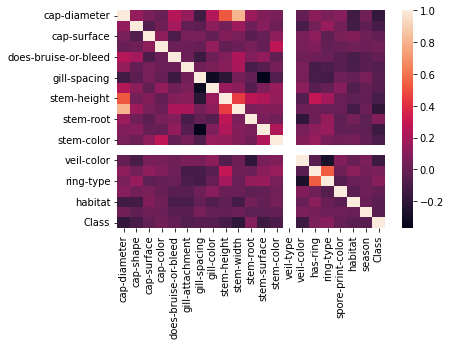

In [26]:
corr_matrix = df_mush.corr()
sns.heatmap(corr_matrix)

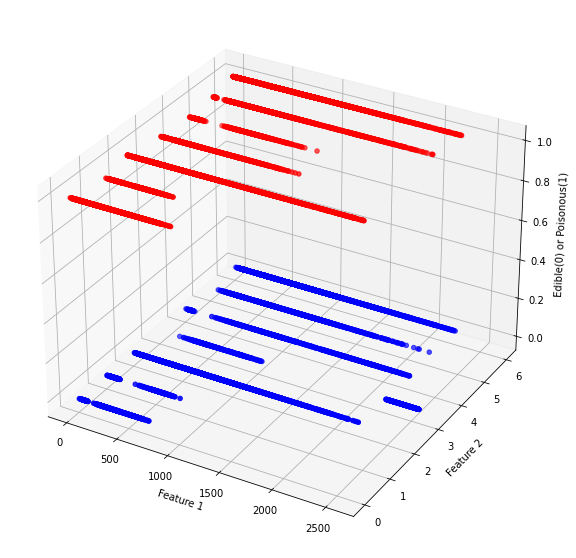

In [27]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train[y_train == 0], c='b')
ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], y_train[y_train == 1], c='r')

ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Edible(0) or Poisonous(1)')

plt.show()

#### Principal Component Analysis (PCA) to reduce dimensions and visualize

In [28]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca2.fit(X_train)
pca2.fit(X_test)

X_train_2D_pca = pca2.transform(X_train)
X_test_2D_pca = pca2.transform(X_test)

print(f'PCA Features Shape: {X_train_2D_pca.shape}')

PCA Features Shape: (48855, 2)


#### PCA 2D plot

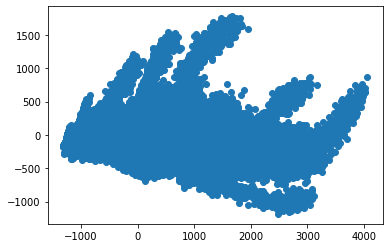

In [29]:
plt.scatter(X_train_2D_pca[:, 0], X_train_2D_pca[:, 1])
plt.show()

#### PCA 3D plot

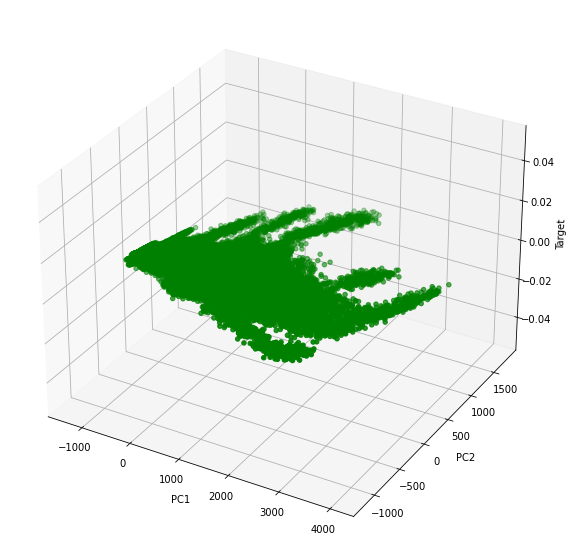

In [30]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_2D_pca[:, 0],X_train_2D_pca[:, 1], c='g')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Target')

plt.show()

#### PCA 3D plot with respect to Class

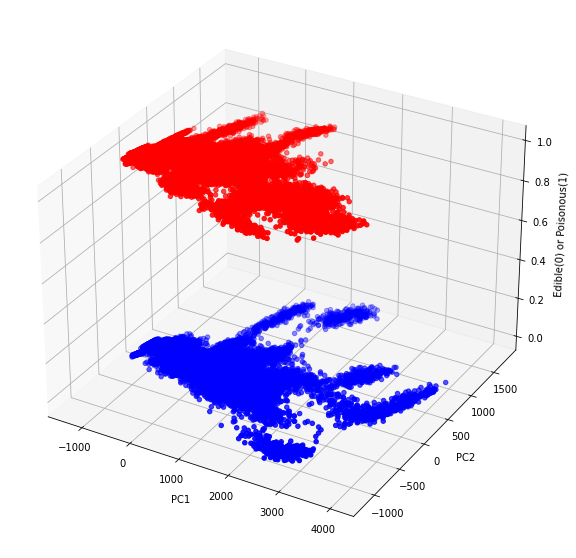

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_2D_pca[:, 0], X_train_2D_pca[:, 1], y_train[y_train == 0], c='b')
ax.scatter(X_train_2D_pca[:, 0], X_train_2D_pca[:, 1], y_train[y_train == 1], c='r')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('Edible(0) or Poisonous(1)')

plt.show()

#### Visualization using TSNE

In [32]:
from sklearn.manifold import TSNE

tsne2 = TSNE(n_components=2, init = 'pca', learning_rate = 'auto')

X_train_2D_tsne = tsne2.fit_transform(X_train)

print(f'tSNE Features Shape: {X_train_2D_tsne.shape}')

tSNE Features Shape: (48855, 2)


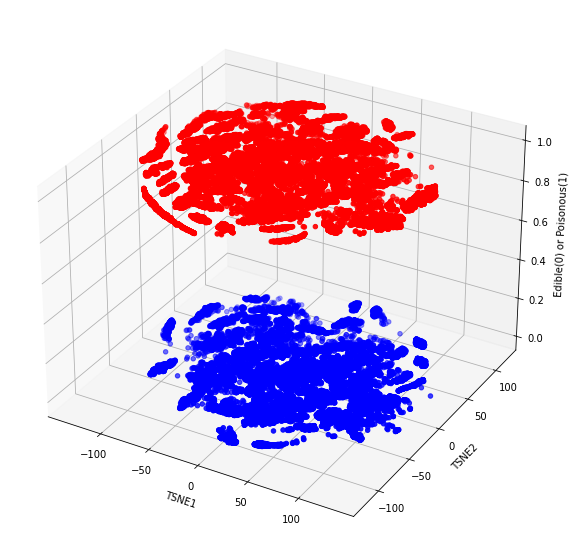

In [33]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(projection='3d')

ax.scatter(X_train_2D_tsne[:, 0], X_train_2D_tsne[:, 1], y_train[y_train == 0], c='b')
ax.scatter(X_train_2D_tsne[:, 0], X_train_2D_tsne[:, 1], y_train[y_train == 1], c='r')

ax.set_xlabel('TSNE1')
ax.set_ylabel('TSNE2')
ax.set_zlabel('Edible(0) or Poisonous(1)')

plt.show()

#### Preparing the Data for the Machine Learning model

In [34]:
X_train.head()

,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
36219,526.0,6.0,3.0,5.0,0.0,6.0,0.0,5.0,513.0,521.0,2.0,7.0,6.0,0.0,4.0,1.0,6.0,2.0,0.0,2.0
54188,650.0,5.0,0.0,6.0,0.0,1.0,0.0,11.0,278.0,722.0,2.0,5.0,12.0,0.0,4.0,0.0,1.0,2.0,2.0,2.0
1609,795.0,6.0,3.0,8.0,0.0,2.0,0.0,10.0,971.0,1382.0,2.0,5.0,11.0,0.0,4.0,1.0,2.0,2.0,0.0,2.0
20481,304.0,6.0,0.0,1.0,0.0,0.0,0.0,6.0,300.0,586.0,2.0,5.0,7.0,0.0,4.0,0.0,1.0,2.0,4.0,2.0
20546,284.0,6.0,3.0,7.0,0.0,0.0,0.0,1.0,272.0,547.0,2.0,5.0,7.0,0.0,4.0,0.0,1.0,2.0,1.0,0.0


In [35]:
y_train.head()

,Class
36219,0
54188,1
1609,1
20481,0
20546,0


In [36]:
X_tr = (X_train.values).astype(np.float32)
y_tr = (y_train.values).astype(np.float32)

X_te = (X_test.values).astype(np.float32)
y_te = (y_test.values).astype(np.float32)

In [37]:
print(X_tr.shape)
print(y_tr.shape)

(48855, 20)
(48855, 1)


In [38]:
print(type(X_tr))
print(type(y_tr))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Pre - Processing

#### Standardization of the dataset

In [39]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_tr)

X_tr_std = sc.transform(X_tr)
X_te_std = sc.transform(X_te)

#### Principle Component Analysis (PCA) for feature reduction

In [40]:
from sklearn.decomposition import PCA
pca2_std = PCA(n_components=2)
pca2_std.fit(X_tr_std)
pca2_std.fit(X_te_std)

X_train_2D_std_pca = pca2_std.transform(X_tr_std)
X_test_2D_std_pca = pca2_std.transform(X_te_std)

#### Select Percentile for feature reduction

In [41]:
from sklearn.feature_selection import SelectPercentile, f_classif

Percentile_selector = SelectPercentile(f_classif, percentile=80)
X_tr_percentile = Percentile_selector.fit_transform(X_tr_std, y_tr)
X_te_percentile = Percentile_selector.fit_transform(X_te_std, y_te)
print(X_tr_percentile.shape)
print(X_te_percentile.shape)

Percentile_selector.get_feature_names_out()

(48855, 16)
(12214, 16)


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [13] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using r

array(['x0', 'x1', 'x3', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x14', 'x15', 'x16', 'x18', 'x19'], dtype=object)

### Logistic Regression for Binary Classification

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using raw data is 0.6339446536761094 %
The Classification Report for Classifier LogisticRegression(): 
              precision    recall  f1-score   support

         0.0       0.61      0.49      0.54      5436
         1.0       0.65      0.75      0.69      6778

    accuracy                           0.63     12214
   macro avg       0.63      0.62      0.62     12214
weighted avg       0.63      0.63      0.63     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (st

Cross - validation score of LogisticRegression is :  0.6915729807010442 +/- 0.0022291690661974776


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


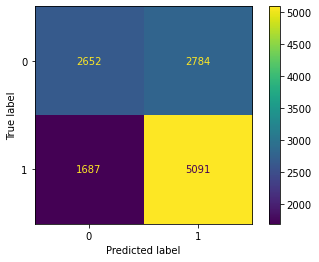

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

lr_clf = LogisticRegression()
lr_clf.fit(X_tr, y_tr)

y_pred = lr_clf.predict(X_te)

score = lr_clf.score(X_te, y_te)
print(f'Classification accuracy using raw data is {score} %')

print("The Classification Report for Classifier %s: \n%s\n" % (lr_clf, classification_report(y_te, y_pred)))

CV_score = cross_val_score(lr_clf, X_tr, y_tr, scoring="f1", cv=5)
print("Cross - validation score of LogisticRegression is : ", CV_score.mean(), '+/-', CV_score.std())

confMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix)

disp.plot()
plt.show()



#### Logistic Regression with Standard Scaled data

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy of Standardized data is 0.6586703782544621 %
The Classification Report for Classifier LogisticRegression(): 
              precision    recall  f1-score   support

         0.0       0.64      0.52      0.58      5436
         1.0       0.67      0.77      0.71      6778

    accuracy                           0.66     12214
   macro avg       0.66      0.65      0.65     12214
weighted avg       0.66      0.66      0.65     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of LogisticRegression_std is :  0.7126318455015996 +/- 0.003491547732622677


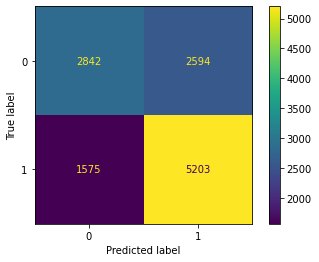

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

lr_clf_std = LogisticRegression()
lr_clf_std.fit(X_tr_std, y_tr)

y_pred_std = lr_clf_std.predict(X_te_std)

score_std = lr_clf_std.score(X_te_std, y_te)
print(f'Classification accuracy of Standardized data is {score_std} %')

print("The Classification Report for Classifier %s: \n%s\n" % (lr_clf_std, classification_report(y_te, y_pred_std)))

CV_score = cross_val_score(lr_clf_std, X_tr_std, y_tr, scoring="f1", cv=5)
print("Cross - validation score of LogisticRegression_std is : ", CV_score.mean(), '+/-', CV_score.std())

confMatrix_std = confusion_matrix(y_true = y_te, y_pred = y_pred_std)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix_std)

disp.plot()
plt.show()

#### Logistic Regression with Principle Component Analysis

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy of pca data is 0.5972654331095464 %
The Classification Report for Classifier LogisticRegression(): 
              precision    recall  f1-score   support

         0.0       0.58      0.34      0.43      5436
         1.0       0.60      0.81      0.69      6778

    accuracy                           0.60     12214
   macro avg       0.59      0.57      0.56     12214
weighted avg       0.59      0.60      0.57     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Cross - validation score of LogisticRegression_pca is :  0.6872806626936259 +/- 0.0047190778248040405


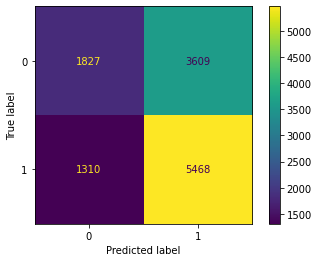

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

lr_clf_pca = LogisticRegression()
lr_clf_pca.fit(X_train_2D_pca, y_tr)

y_pred_pca = lr_clf_pca.predict(X_test_2D_pca)

score_pca = lr_clf_pca.score(X_test_2D_pca, y_te)
print(f'Classification accuracy of pca data is {score_pca} %')

print("The Classification Report for Classifier %s: \n%s\n" % (lr_clf_pca, classification_report(y_te, y_pred_pca)))

CV_score = cross_val_score(lr_clf_pca, X_train_2D_pca, y_tr, scoring="f1", cv=5)
print("Cross - validation score of LogisticRegression_pca is : ", CV_score.mean(), '+/-', CV_score.std())

confMatrix_pca = confusion_matrix(y_true = y_te, y_pred = y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix_pca)

disp.plot()
plt.show()

#### Logistic Regression with Select Percentile 

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy of percentile data is 0.6592434910758146 %
The Classification Report for Classifier LogisticRegression(): 
              precision    recall  f1-score   support

         0.0       0.64      0.52      0.58      5436
         1.0       0.67      0.77      0.71      6778

    accuracy                           0.66     12214
   macro avg       0.66      0.65      0.65     12214
weighted avg       0.66      0.66      0.65     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of LogisticRegression_pca is :  0.7129279789001794 +/- 0.003420259036675797


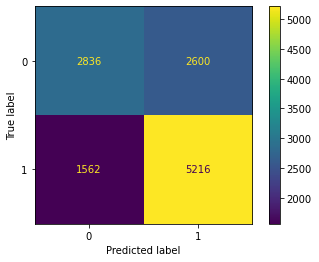

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

lr_clf_percentile = LogisticRegression()
lr_clf_percentile.fit(X_tr_percentile, y_tr)

y_pred_percentile = lr_clf_percentile.predict(X_te_percentile)

score_percentile = lr_clf_percentile.score(X_te_percentile, y_te)
print(f'Classification accuracy of percentile data is {score_percentile} %')

print("The Classification Report for Classifier %s: \n%s\n" % (lr_clf_percentile, classification_report(y_te, y_pred_percentile)))

CV_score = cross_val_score(lr_clf_percentile, X_tr_percentile, y_tr, scoring="f1", cv=5)
print("Cross - validation score of LogisticRegression_pca is : ", CV_score.mean(), '+/-', CV_score.std())

confMatrix_pca = confusion_matrix(y_true = y_te, y_pred = y_pred_percentile)
disp = ConfusionMatrixDisplay(confusion_matrix = confMatrix_pca)

disp.plot()
plt.show()

#### Support Vector Machine (SVM)

##### SVM using LinearSVC with Raw Data

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using raw data is 0.5461765187489765 %
The Classification Report for Classifier LinearSVC(): 
              precision    recall  f1-score   support

         0.0       0.49      0.94      0.65      5436
         1.0       0.82      0.23      0.36      6778

    accuracy                           0.55     12214
   macro avg       0.66      0.58      0.50     12214
weighted avg       0.68      0.55      0.49     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\U

Cross - validation score of LinearSVM is :  0.4240313093819436 +/- 0.21904877937335163


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


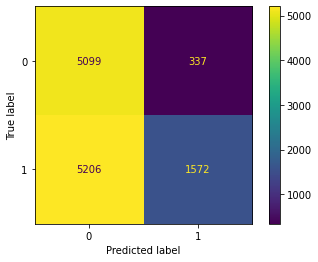

In [46]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

linearSVC = LinearSVC()
linearSVC.fit(X_tr, y_tr)

y_pred_lin = linearSVC.predict(X_te)

score_lin = linearSVC.score(X_te, y_te)
print(f'Classification accuracy using raw data is {score_lin} %')

print("The Classification Report for Classifier %s: \n%s\n" % (linearSVC,classification_report(y_te, y_pred_lin)))

CV_score = cross_val_score(linearSVC, X_tr, y_tr, scoring="f1", cv=5)
print("Cross - validation score of LinearSVM is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_lin)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()


#### SVM using LinearSVC with Standardized Data

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using standardized data is 0.658261011953496 %
The Classification Report for Classifier LinearSVC(): 
              precision    recall  f1-score   support

         0.0       0.64      0.52      0.57      5436
         1.0       0.67      0.77      0.71      6778

    accuracy                           0.66     12214
   macro avg       0.66      0.64      0.64     12214
weighted avg       0.66      0.66      0.65     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\U

Cross - validation score of LinearSVM_std is :  0.7135815100791723 +/- 0.003402955825267324


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


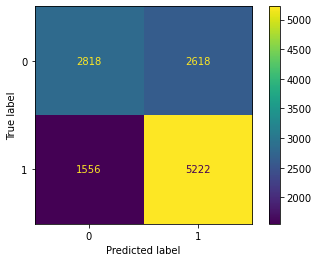

In [47]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

linearSVC_std = LinearSVC()
linearSVC_std.fit(X_tr_std, y_tr)

y_pred_lin_std = linearSVC_std.predict(X_te_std)

score_lin_std = linearSVC_std.score(X_te_std, y_te)
print(f'Classification accuracy using standardized data is {score_lin_std} %')

print("The Classification Report for Classifier %s: \n%s\n" % (linearSVC_std,classification_report(y_te, y_pred_lin_std)))

CV_score = cross_val_score(linearSVC_std, X_tr_std, y_tr, scoring="f1", cv=5)
print("Cross - validation score of LinearSVM_std is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_lin_std)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()


#### SVM using LinearSVC with Principle Component Analysis

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using pca data is 0.5880137547077124 %
The Classification Report for Classifier LinearSVC(): 
              precision    recall  f1-score   support

         0.0       0.55      0.38      0.45      5436
         1.0       0.60      0.76      0.67      6778

    accuracy                           0.59     12214
   macro avg       0.58      0.57      0.56     12214
weighted avg       0.58      0.59      0.57     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceW

Cross - validation score of LinearSVM_pca is :  0.6715568087722982 +/- 0.0045607675259646385


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


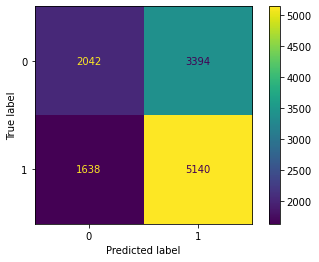

In [48]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

linearSVC_pca = LinearSVC()
linearSVC_pca.fit(X_train_2D_std_pca, y_tr)

y_pred_lin_pca = linearSVC_pca.predict(X_test_2D_std_pca)

score_lin_pca = linearSVC_pca.score(X_test_2D_std_pca, y_te)
print(f'Classification accuracy using pca data is {score_lin_pca} %')

print("The Classification Report for Classifier %s: \n%s\n" % (linearSVC_pca,classification_report(y_te, y_pred_lin_pca)))

CV_score = cross_val_score(linearSVC_pca, X_train_2D_std_pca, y_tr, scoring="f1", cv=5)
print("Cross - validation score of LinearSVM_pca is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_lin_pca)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()


#### SVM using LinearSVC with Select Percentile feature reduction

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using percentile data is 0.6593253643360079 %
The Classification Report for Classifier LinearSVC(): 
              precision    recall  f1-score   support

         0.0       0.65      0.52      0.58      5436
         1.0       0.67      0.77      0.72      6778

    accuracy                           0.66     12214
   macro avg       0.66      0.65      0.65     12214
weighted avg       0.66      0.66      0.65     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\U

Cross - validation score of LinearSVM_percentile is :  0.7140441890961471 +/- 0.0033462757341770812


c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


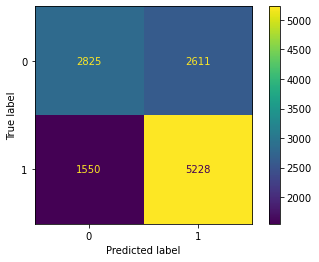

In [49]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

linearSVC_percentile = LinearSVC()
linearSVC_percentile.fit(X_tr_percentile, y_tr)

y_pred_lin_percentile = linearSVC_percentile.predict(X_te_percentile)

score_lin_percentile = linearSVC_percentile.score(X_te_percentile, y_te)
print(f'Classification accuracy using percentile data is {score_lin_percentile} %')

print("The Classification Report for Classifier %s: \n%s\n" % (linearSVC_percentile,classification_report(y_te, y_pred_lin_percentile)))

CV_score = cross_val_score(linearSVC_percentile, X_tr_percentile, y_tr, scoring="f1", cv=5)
print("Cross - validation score of LinearSVM_percentile is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_lin_percentile)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### SVM using SVC Kernel : [Linear, RBF and Poly]

##### PCA for SVM Kernel analysis (10 components)

In [50]:
from sklearn.decomposition import PCA
pca2_svm_std = PCA(n_components=10)
pca2_svm_std.fit(X_tr_std)
pca2_svm_std.fit(X_te_std)

X_tr_pca_svm = pca2_svm_std.transform(X_tr_std)
X_te_pca_svm = pca2_svm_std.transform(X_te_std)

print(f'PCA Features Shape: {X_tr_pca_svm.shape}')

PCA Features Shape: (48855, 10)


##### SVC using PCA (kernel = linear)

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using pca data is 0.5950548550843294 %
The Classification Report for Classifier SVC(kernel='linear'): 
              precision    recall  f1-score   support

         0.0       0.57      0.37      0.45      5436
         1.0       0.61      0.78      0.68      6778

    accuracy                           0.60     12214
   macro avg       0.59      0.57      0.56     12214
weighted avg       0.59      0.60      0.58     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of LinearSVM_pca is :  0.6803687987622957 +/- 0.004057745121488417


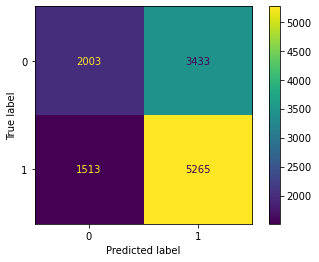

In [51]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

linearSVM_pca = SVC(kernel='linear')
linearSVM_pca.fit(X_tr_pca_svm, y_tr)

y_pred_svm_pca = linearSVM_pca.predict(X_te_pca_svm)

score_svm_pca = linearSVM_pca.score(X_te_pca_svm, y_te)
print(f'Classification accuracy using pca data is {score_svm_pca} %')

print("The Classification Report for Classifier %s: \n%s\n" % (linearSVM_pca,classification_report(y_te, y_pred_svm_pca)))

CV_score = cross_val_score(linearSVM_pca, X_tr_pca_svm, y_tr, scoring="f1", cv=5)
print("Cross - validation score of LinearSVM_pca is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_svm_pca)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

##### SVC using PCA (kernel = rbf)

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using pca data is 0.9714262321925659 %
The Classification Report for Classifier SVC(gamma='auto'): 
              precision    recall  f1-score   support

         0.0       0.96      0.97      0.97      5436
         1.0       0.98      0.97      0.97      6778

    accuracy                           0.97     12214
   macro avg       0.97      0.97      0.97     12214
weighted avg       0.97      0.97      0.97     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of rbfSVM_pca is :  0.9721842299569328 +/- 0.0016023301453285958


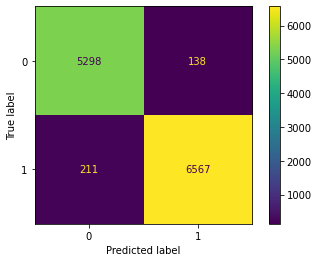

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

rbfSVM_pca = SVC(kernel='rbf', gamma = 'auto')
rbfSVM_pca.fit(X_tr_pca_svm, y_tr)

y_pred_svm_pca = rbfSVM_pca.predict(X_te_pca_svm)

score_svm_pca = rbfSVM_pca.score(X_te_pca_svm, y_te)
print(f'Classification accuracy using pca data is {score_svm_pca} %')

print("The Classification Report for Classifier %s: \n%s\n" % (rbfSVM_pca,classification_report(y_te, y_pred_svm_pca)))

CV_score = cross_val_score(rbfSVM_pca, X_tr_pca_svm, y_tr, scoring="f1", cv=5)
print("Cross - validation score of rbfSVM_pca is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_svm_pca)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

##### SVC using PCA (kernel = poly)

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using pca data is 0.8875880137547077 %
The Classification Report for Classifier SVC(kernel='poly'): 
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88      5436
         1.0       0.91      0.88      0.90      6778

    accuracy                           0.89     12214
   macro avg       0.89      0.89      0.89     12214
weighted avg       0.89      0.89      0.89     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of PolySVM_pca is :  0.8901040332017987 +/- 0.00304006581655508


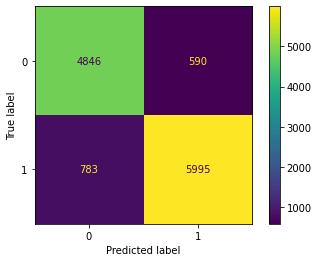

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

PolySVM_pca = SVC(kernel='poly')
PolySVM_pca.fit(X_tr_pca_svm, y_tr)

y_pred_svm_pca = PolySVM_pca.predict(X_te_pca_svm)

score_svm_pca = PolySVM_pca.score(X_te_pca_svm, y_te)
print(f'Classification accuracy using pca data is {score_svm_pca} %')

print("The Classification Report for Classifier %s: \n%s\n" % (PolySVM_pca,classification_report(y_te, y_pred_svm_pca)))

CV_score = cross_val_score(PolySVM_pca, X_tr_pca_svm, y_tr, scoring="f1", cv=5)
print("Cross - validation score of PolySVM_pca is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_svm_pca)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### SVM using SVC Kernel (Select Percentile) : [Linear, RBF and Poly]

##### SVC using Select Percentile (kernel = linear)

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using percentile data is 0.6653839855903062 %
The Classification Report for Classifier SVC(kernel='linear'): 
              precision    recall  f1-score   support

         0.0       0.65      0.54      0.59      5436
         1.0       0.68      0.76      0.72      6778

    accuracy                           0.67     12214
   macro avg       0.66      0.65      0.65     12214
weighted avg       0.66      0.67      0.66     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of LinearSVC is :  0.7150932948105766 +/- 0.003777045242336179


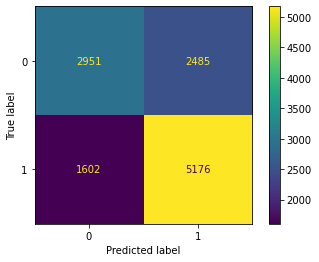

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

linSVC_percentile = SVC(kernel='linear')
linSVC_percentile.fit(X_tr_percentile, y_tr)

y_pred_svc_percentile = linSVC_percentile.predict(X_te_percentile)

score_svc_percentile = linSVC_percentile.score(X_te_percentile, y_te)
print(f'Classification accuracy using percentile data is {score_svc_percentile} %')

print("The Classification Report for Classifier %s: \n%s\n" % (linSVC_percentile,classification_report(y_te, y_pred_svc_percentile)))

CV_score = cross_val_score(linSVC_percentile, X_tr_percentile, y_tr, scoring="f1", cv=5)
print("Cross - validation score of LinearSVC is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_svc_percentile)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

##### SVC using Select Percentile (kernel = rbf)

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using percentile data is 0.9757655149828066 %
The Classification Report for Classifier SVC(gamma='auto'): 
              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97      5436
         1.0       0.98      0.98      0.98      6778

    accuracy                           0.98     12214
   macro avg       0.98      0.98      0.98     12214
weighted avg       0.98      0.98      0.98     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of rbfSVC is :  0.974709826698744 +/- 0.0010752351231386329


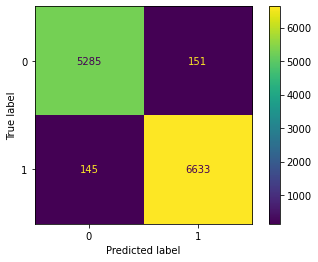

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

rbfSVC_percentile = SVC(kernel='rbf', gamma = 'auto')
rbfSVC_percentile.fit(X_tr_percentile, y_tr)

y_pred_svc_percentile = rbfSVC_percentile.predict(X_te_percentile)

score_svc_percentile = rbfSVC_percentile.score(X_te_percentile, y_te)
print(f'Classification accuracy using percentile data is {score_svc_percentile} %')

print("The Classification Report for Classifier %s: \n%s\n" % (rbfSVC_percentile,classification_report(y_te, y_pred_svc_percentile)))

CV_score = cross_val_score(rbfSVC_percentile, X_tr_percentile, y_tr, scoring="f1", cv=5)
print("Cross - validation score of rbfSVC is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_svc_percentile)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

##### SVC using Select Percentile (kernel = poly)

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using percentile data is 0.9585721303422302 %
The Classification Report for Classifier SVC(kernel='poly'): 
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      5436
         1.0       0.96      0.96      0.96      6778

    accuracy                           0.96     12214
   macro avg       0.96      0.96      0.96     12214
weighted avg       0.96      0.96      0.96     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of polySVC is :  0.9594281131565892 +/- 0.0012475229328339275


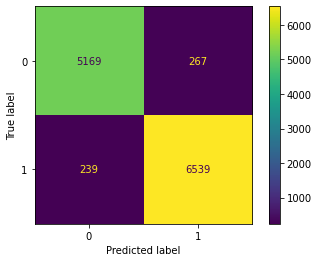

In [56]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

polySVC_percentile = SVC(kernel='poly')
polySVC_percentile.fit(X_tr_percentile, y_tr)

y_pred_svc_percentile = polySVC_percentile.predict(X_te_percentile)

score_svc_percentile = polySVC_percentile.score(X_te_percentile, y_te)
print(f'Classification accuracy using percentile data is {score_svc_percentile} %')

print("The Classification Report for Classifier %s: \n%s\n" % (polySVC_percentile,classification_report(y_te, y_pred_svc_percentile)))

CV_score = cross_val_score(polySVC_percentile, X_tr_percentile, y_tr, scoring="f1", cv=5)
print("Cross - validation score of polySVC is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_svc_percentile)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

### Decision Tree Classifier

#### Decision Trees with Raw Data

Classification accuracy using raw data is 0.7406255117078762 %
The Classification Report for Classifier DecisionTreeClassifier(max_depth=5): 
              precision    recall  f1-score   support

         0.0       0.67      0.81      0.74      5436
         1.0       0.82      0.68      0.74      6778

    accuracy                           0.74     12214
   macro avg       0.75      0.75      0.74     12214
weighted avg       0.75      0.74      0.74     12214


Cross - validation score of DecisionTree is :  0.735360840682365 +/- 0.01353548260199401


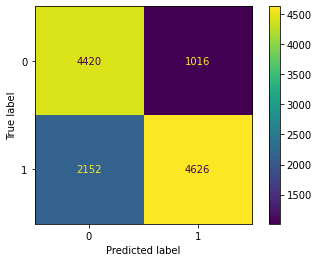

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

tree_clf = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf.fit(X_tr, y_tr)

y_pred = tree_clf.predict(X_te)

score = tree_clf.score(X_te, y_te)
print(f'Classification accuracy using raw data is {score} %')

print("The Classification Report for Classifier %s: \n%s\n" % (tree_clf,classification_report(y_te, y_pred)))

CV_score = cross_val_score(tree_clf, X_tr, y_tr, scoring="f1", cv=5)
print("Cross - validation score of DecisionTree is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### Decision Trees with Standardized Data

Classification accuracy using standardized data is 0.7406255117078762 %
The Classification Report for Classifier DecisionTreeClassifier(max_depth=5): 
              precision    recall  f1-score   support

         0.0       0.67      0.81      0.74      5436
         1.0       0.82      0.68      0.74      6778

    accuracy                           0.74     12214
   macro avg       0.75      0.75      0.74     12214
weighted avg       0.75      0.74      0.74     12214


Cross - validation score of DecisionTree_std is :  0.7354266788306515 +/- 0.01357408913920546


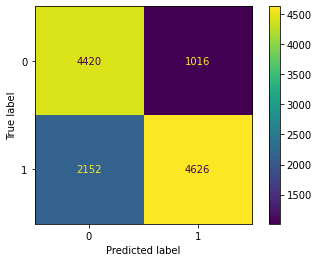

In [58]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

tree_clf_std = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf_std.fit(X_tr_std, y_tr)  

y_pred_std = tree_clf_std.predict(X_te_std)

score_std = tree_clf_std.score(X_te_std, y_te)
print(f'Classification accuracy using standardized data is {score_std} %')

print("The Classification Report for Classifier %s: \n%s\n" % (tree_clf_std,classification_report(y_te, y_pred_std)))

CV_score = cross_val_score(tree_clf_std, X_tr_std, y_tr, scoring="f1", cv=5)
print("Cross - validation score of DecisionTree_std is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_std)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### Decision Tree with Principal Component Analysis

Classification accuracy using pca data is 0.644178811200262 %
The Classification Report for Classifier DecisionTreeClassifier(max_depth=5): 
              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60      5436
         1.0       0.68      0.68      0.68      6778

    accuracy                           0.64     12214
   macro avg       0.64      0.64      0.64     12214
weighted avg       0.64      0.64      0.64     12214


Cross - validation score of DecisionTree_pca is :  0.6758985569975525 +/- 0.017113163834724842


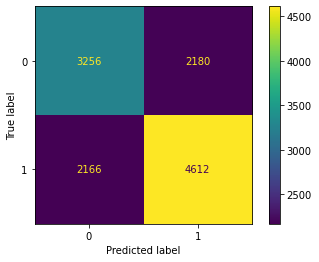

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

tree_clf_pca = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf_pca.fit(X_train_2D_std_pca, y_tr)

y_pred_pca = tree_clf_pca.predict(X_test_2D_std_pca)

score_pca = tree_clf_pca.score(X_test_2D_std_pca, y_te)
print(f'Classification accuracy using pca data is {score_pca} %')

print("The Classification Report for Classifier %s: \n%s\n" % (tree_clf_pca,classification_report(y_te, y_pred_pca)))

CV_score = cross_val_score(tree_clf_pca, X_train_2D_std_pca, y_tr, scoring="f1", cv=5)
print("Cross - validation score of DecisionTree_pca is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### Decision Tree with Select Percentile for feature reduction

Classification accuracy using percentile data is 0.7277714098575405 %
The Classification Report for Classifier DecisionTreeClassifier(max_depth=5): 
              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72      5436
         1.0       0.80      0.69      0.74      6778

    accuracy                           0.73     12214
   macro avg       0.73      0.73      0.73     12214
weighted avg       0.74      0.73      0.73     12214


Cross - validation score of DecisionTree_percentile is :  0.7378883446296507 +/- 0.004700856920457022


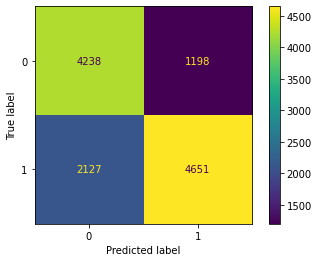

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

tree_clf_percentile = DecisionTreeClassifier(criterion='gini', max_depth=5)
tree_clf_percentile.fit(X_tr_percentile, y_tr)

y_pred_percentile = tree_clf_percentile.predict(X_te_percentile)

score_percentile = tree_clf_percentile.score(X_te_percentile, y_te)
print(f'Classification accuracy using percentile data is {score_percentile} %')

print("The Classification Report for Classifier %s: \n%s\n" % (tree_clf_percentile,classification_report(y_te, y_pred_percentile)))

CV_score = cross_val_score(tree_clf_percentile, X_tr_percentile, y_tr, scoring="f1", cv=5)
print("Cross - validation score of DecisionTree_percentile is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_percentile)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

### Random Forest Classifier

#### Random Forest with Raw Data

C:\Users\abbis\AppData\Local\Temp\ipykernel_3644\2792683311.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_clf.fit(X_tr, y_tr)


Classification accuracy using raw data is 0.8030948092353037 %
The Classification Report for Classifier RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1): 
              precision    recall  f1-score   support

         0.0       0.76      0.81      0.79      5436
         1.0       0.84      0.79      0.82      6778

    accuracy                           0.80     12214
   macro avg       0.80      0.80      0.80     12214
weighted avg       0.81      0.80      0.80     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Py

Cross - validation score of RandomForest is :  0.8098557125586069 +/- 0.006082084625261351


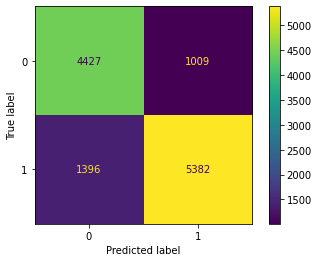

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

forest_clf = RandomForestClassifier(n_estimators=500, max_depth=5, n_jobs=-1)
forest_clf.fit(X_tr, y_tr)

y_pred = forest_clf.predict(X_te)

score = forest_clf.score(X_te, y_te)
print(f'Classification accuracy using raw data is {score} %')

print("The Classification Report for Classifier %s: \n%s\n" % (forest_clf,classification_report(y_te, y_pred)))

CV_score = cross_val_score(forest_clf, X_tr, y_tr, scoring="f1", cv=5)
print("Cross - validation score of RandomForest is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### Random Forest with Standardized Data

C:\Users\abbis\AppData\Local\Temp\ipykernel_3644\3608790686.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_clf_std.fit(X_tr_std, y_tr)


Classification accuracy using standardized data is 0.8021942033731784 %
The Classification Report for Classifier RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1): 
              precision    recall  f1-score   support

         0.0       0.76      0.82      0.79      5436
         1.0       0.84      0.79      0.82      6778

    accuracy                           0.80     12214
   macro avg       0.80      0.80      0.80     12214
weighted avg       0.81      0.80      0.80     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Py

Cross - validation score of RandomForest is :  0.8056021280566462 +/- 0.010201524267691008


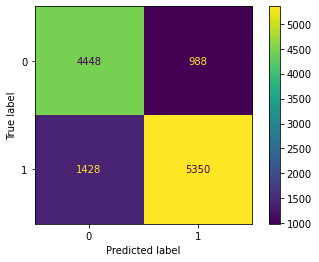

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

forest_clf_std = RandomForestClassifier(n_estimators=500, max_depth=5, n_jobs=-1)
forest_clf_std.fit(X_tr_std, y_tr)

y_pred_std = forest_clf_std.predict(X_te_std)

score_std = forest_clf_std.score(X_te_std, y_te)
print(f'Classification accuracy using standardized data is {score_std} %')

print("The Classification Report for Classifier %s: \n%s\n" % (forest_clf_std,classification_report(y_te, y_pred_std)))

CV_score = cross_val_score(forest_clf_std, X_tr_std, y_tr, scoring="f1", cv=5)
print("Cross - validation score of RandomForest is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_std)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### Random Forest with Principal Component Analysis

C:\Users\abbis\AppData\Local\Temp\ipykernel_3644\458414488.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_clf_pca.fit(X_train_2D_std_pca, y_tr)


Classification accuracy using pca data is 0.6759456361552317 %
The Classification Report for Classifier RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1): 
              precision    recall  f1-score   support

         0.0       0.62      0.68      0.65      5436
         1.0       0.72      0.67      0.70      6778

    accuracy                           0.68     12214
   macro avg       0.67      0.68      0.67     12214
weighted avg       0.68      0.68      0.68     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Py

Cross - validation score of RandomForest is :  0.6923732641332003 +/- 0.005607023748955472


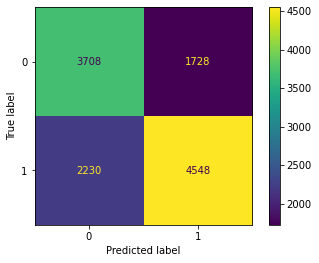

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

forest_clf_pca = RandomForestClassifier(n_estimators=500, max_depth=5, n_jobs=-1)
forest_clf_pca.fit(X_train_2D_std_pca, y_tr)

y_pred_pca = forest_clf_pca.predict(X_test_2D_std_pca)

score_pca = forest_clf_pca.score(X_test_2D_std_pca, y_te)
print(f'Classification accuracy using pca data is {score_pca} %')

print("The Classification Report for Classifier %s: \n%s\n" % (forest_clf_pca,classification_report(y_te, y_pred_pca)))

CV_score = cross_val_score(forest_clf_pca, X_train_2D_std_pca, y_tr, scoring="f1", cv=5)
print("Cross - validation score of RandomForest is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### Random Forest with Select Percentile feature reduction

C:\Users\abbis\AppData\Local\Temp\ipykernel_3644\2504598114.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_clf_percentile.fit(X_tr_percentile, y_tr)


Classification accuracy using percentile data is 0.7564270509251678 %
The Classification Report for Classifier RandomForestClassifier(max_depth=5, n_estimators=500, n_jobs=-1): 
              precision    recall  f1-score   support

         0.0       0.69      0.81      0.75      5436
         1.0       0.82      0.71      0.76      6778

    accuracy                           0.76     12214
   macro avg       0.76      0.76      0.76     12214
weighted avg       0.77      0.76      0.76     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Py

Cross - validation score of RandomForest is :  0.7734278845692552 +/- 0.004779373413423238


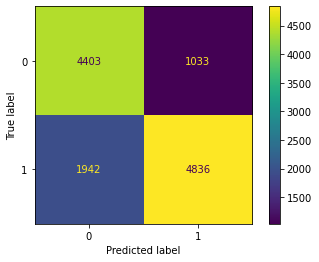

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

forest_clf_percentile = RandomForestClassifier(n_estimators=500, max_depth=5, n_jobs=-1)
forest_clf_percentile.fit(X_tr_percentile, y_tr)

y_pred_percentile = forest_clf_percentile.predict(X_te_percentile)

score_percentile = forest_clf_percentile.score(X_te_percentile, y_te)
print(f'Classification accuracy using percentile data is {score_percentile} %')

print("The Classification Report for Classifier %s: \n%s\n" % (forest_clf_percentile,classification_report(y_te, y_pred_percentile)))

CV_score = cross_val_score(forest_clf_percentile, X_tr_percentile, y_tr, scoring="f1", cv=5)
print("Cross - validation score of RandomForest is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_percentile)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### Applying Hyperparameter tuning using Grid search for Random Forest standardized data

In [65]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = [{'n_estimators':[i for i in range(100,1000,100)], 'max_depth': [j for j in range(2,15,2)]}]

grid_search_rf = GridSearchCV(estimator = forest_clf_std, param_grid = param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_tr_std, y_tr)

print(grid_search_rf.best_params_)
print(grid_search_rf.best_estimator_)

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_search.py:909: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'max_depth': 14, 'n_estimators': 500}
RandomForestClassifier(max_depth=14, n_estimators=500, n_jobs=-1)


C:\Users\abbis\AppData\Local\Temp\ipykernel_3644\3043468766.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_clf_std_grid.fit(X_tr_std, y_tr)


Classification accuracy using standardized data is 0.9987719010971017 %
The Classification Report for Classifier RandomForestClassifier(max_depth=14, n_estimators=500, n_jobs=-1): 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5436
         1.0       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\abbis\AppData\Local\Programs\Py

Cross - validation score of RandomForest is :  0.9988740669640711 +/- 0.0002943338676930638


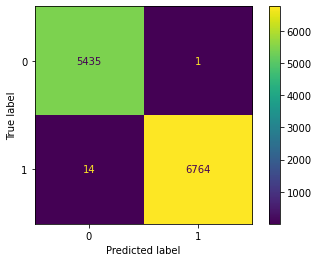

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

forest_clf_std_grid = RandomForestClassifier(n_estimators=500, max_depth=14, n_jobs=-1)
forest_clf_std_grid.fit(X_tr_std, y_tr)

y_pred_std = forest_clf_std_grid.predict(X_te_std)

score_std = forest_clf_std_grid.score(X_te_std, y_te)
print(f'Classification accuracy using standardized data is {score_std} %')

print("The Classification Report for Classifier %s: \n%s\n" % (forest_clf_std_grid,classification_report(y_te, y_pred_std)))

CV_score = cross_val_score(forest_clf_std_grid, X_tr_std, y_tr, scoring="f1", cv=5)
print("Cross - validation score of RandomForest is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_std)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

### Ada Boost Classifier

#### Ada Boost Classifier with Raw Data

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using raw data is 0.9999181267398067 %
The Classification Report for Classifier AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.5, n_estimators=500): 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5436
         1.0       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of RandomForest is :  0.9999262298859606 +/- 6.900789571761134e-05


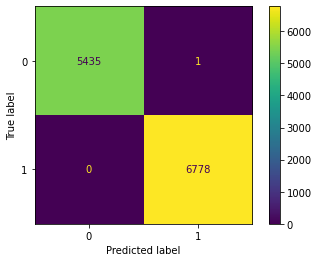

In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500, algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_tr, y_tr)

y_pred = ada_clf.predict(X_te)

score = ada_clf.score(X_te, y_te)
print(f'Classification accuracy using raw data is {score} %')

print("The Classification Report for Classifier %s: \n%s\n" % (ada_clf,classification_report(y_te, y_pred)))

CV_score = cross_val_score(ada_clf, X_tr, y_tr, scoring="f1", cv=5)
print("Cross - validation score of RandomForest is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### Ada Boost Classifier with Standardized Data

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using standardized data is 1.0 %
The Classification Report for Classifier AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.5, n_estimators=500): 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5436
         1.0       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of RandomForest is :  0.9999446715641532 +/- 7.377266506438003e-05


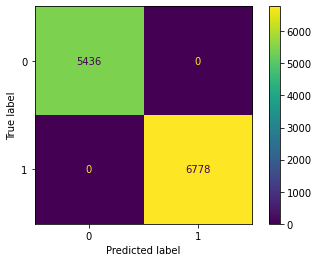

In [70]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

ada_clf_std = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500, algorithm="SAMME.R", learning_rate=0.5)
ada_clf_std.fit(X_tr_std, y_tr)

y_pred_std = ada_clf_std.predict(X_te_std)

score_std = ada_clf_std.score(X_te_std, y_te)
print(f'Classification accuracy using standardized data is {score_std} %')

print("The Classification Report for Classifier %s: \n%s\n" % (ada_clf_std,classification_report(y_te, y_pred_std)))

CV_score = cross_val_score(ada_clf_std, X_tr_std, y_tr, scoring="f1", cv=5)
print("Cross - validation score of RandomForest is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_std)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### Ada Boost Classifier with Principal Component Analysis

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using pca data is 0.712379236941215 %
The Classification Report for Classifier AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.5, n_estimators=500): 
              precision    recall  f1-score   support

         0.0       0.67      0.68      0.68      5436
         1.0       0.74      0.74      0.74      6778

    accuracy                           0.71     12214
   macro avg       0.71      0.71      0.71     12214
weighted avg       0.71      0.71      0.71     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of RandomForest is :  0.7322350798045537 +/- 0.005129303348328122


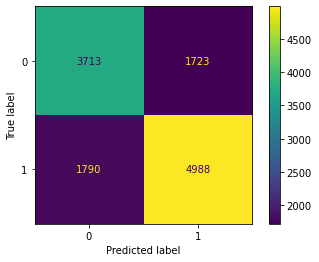

In [71]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

ada_clf_pca = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500, algorithm="SAMME.R", learning_rate=0.5)
ada_clf_pca.fit(X_train_2D_std_pca, y_tr)

y_pred_pca = ada_clf_pca.predict(X_test_2D_std_pca)

score_pca = ada_clf_pca.score(X_test_2D_std_pca, y_te)
print(f'Classification accuracy using pca data is {score_pca} %')

print("The Classification Report for Classifier %s: \n%s\n" % (ada_clf_pca,classification_report(y_te, y_pred_pca)))

CV_score = cross_val_score(ada_clf_pca, X_train_2D_std_pca, y_tr, scoring="f1", cv=5)
print("Cross - validation score of RandomForest is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### Ada Boost Classifier with Select Percentile feature reduction

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using percentile data is 0.9998362534796136 %
The Classification Report for Classifier AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=0.5, n_estimators=500): 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5436
         1.0       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1143: DataC

Cross - validation score of RandomForest is :  0.9998155662098481 +/- 0.00013041678928862866


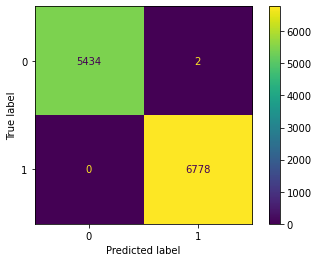

In [72]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

ada_clf_percentile = AdaBoostClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=500, algorithm="SAMME.R", learning_rate=0.5)
ada_clf_percentile.fit(X_tr_percentile, y_tr)

y_pred_percentile = ada_clf_percentile.predict(X_te_percentile)

score_percentile = ada_clf_percentile.score(X_te_percentile, y_te)
print(f'Classification accuracy using percentile data is {score_percentile} %')

print("The Classification Report for Classifier %s: \n%s\n" % (ada_clf_percentile,classification_report(y_te, y_pred_percentile)))

CV_score = cross_val_score(ada_clf_percentile, X_tr_percentile, y_tr, scoring="f1", cv=5)
print("Cross - validation score of RandomForest is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_percentile)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

### Gradient Boost Classifier

#### Gradient Boost Classifier with Raw Data

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using raw data is 0.9999181267398067 %
The Classification Report for Classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=5, n_estimators=500): 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5436
         1.0       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A 

Cross - validation score of RandomForest is :  0.9999262298856468 +/- 0.00010753312198210392


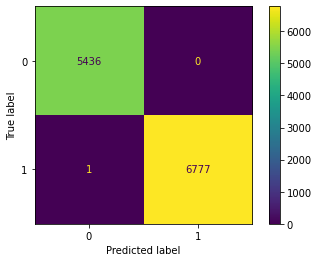

In [73]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

gb_clf = GradientBoostingClassifier(max_depth= 5, n_estimators=500, learning_rate=1.0)  
gb_clf.fit(X_tr, y_tr)

y_pred = gb_clf.predict(X_te)

score = gb_clf.score(X_te, y_te)
print(f'Classification accuracy using raw data is {score} %')

print("The Classification Report for Classifier %s: \n%s\n" % (gb_clf,classification_report(y_te, y_pred)))

CV_score = cross_val_score(gb_clf, X_tr, y_tr, scoring="f1", cv=5)
print("Cross - validation score of RandomForest is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### Gradient Boost Classifier with Standardized Data

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using standardized data is 0.9999181267398067 %
The Classification Report for Classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=5, n_estimators=500): 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5436
         1.0       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A 

Cross - validation score of RandomForest is :  0.9999262298856468 +/- 0.00010753312198210392


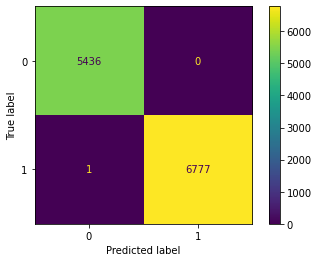

In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

gb_clf_std = GradientBoostingClassifier(max_depth= 5, n_estimators=500, learning_rate=1.0)
gb_clf_std.fit(X_tr_std, y_tr)

y_pred_std = gb_clf_std.predict(X_te_std)

score_std = gb_clf_std.score(X_te_std, y_te)
print(f'Classification accuracy using standardized data is {score_std} %')

print("The Classification Report for Classifier %s: \n%s\n" % (gb_clf_std,classification_report(y_te, y_pred_std)))

CV_score = cross_val_score(gb_clf_std, X_tr_std, y_tr, scoring="f1", cv=5)
print("Cross - validation score of RandomForest is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_std)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### Gradient Boost Classifier with Principal Component Analysis

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using pca data is 0.7037006713607336 %
The Classification Report for Classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=5, n_estimators=500): 
              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67      5436
         1.0       0.73      0.73      0.73      6778

    accuracy                           0.70     12214
   macro avg       0.70      0.70      0.70     12214
weighted avg       0.70      0.70      0.70     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A 

Cross - validation score of RandomForest is :  0.736669709518171 +/- 0.0014025594264205105


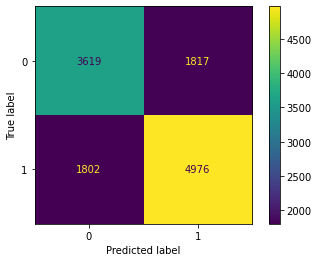

In [75]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

gb_clf_pca = GradientBoostingClassifier(max_depth= 5, n_estimators=500, learning_rate=1.0)
gb_clf_pca.fit(X_train_2D_std_pca, y_tr)

y_pred_pca = gb_clf_pca.predict(X_test_2D_std_pca)

score_pca = gb_clf_pca.score(X_test_2D_std_pca, y_te)
print(f'Classification accuracy using pca data is {score_pca} %')

print("The Classification Report for Classifier %s: \n%s\n" % (gb_clf_pca,classification_report(y_te, y_pred_pca)))

CV_score = cross_val_score(gb_clf_pca, X_train_2D_std_pca, y_tr, scoring="f1", cv=5)
print("Cross - validation score of RandomForest is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_pca)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()

#### Gradient Boost Classifier with Select Percentile feature reduction

c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification accuracy using percentile data is 1.0 %
The Classification Report for Classifier GradientBoostingClassifier(learning_rate=1.0, max_depth=5, n_estimators=500): 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5436
         1.0       1.00      1.00      1.00      6778

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214




c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\abbis\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A 

Cross - validation score of RandomForest is :  0.9997048957305708 +/- 0.00017882115742585332


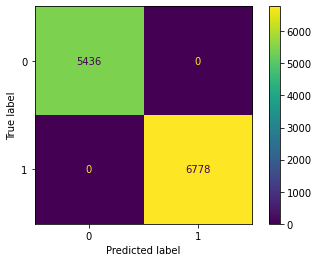

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

gb_clf_percentile = GradientBoostingClassifier(max_depth= 5, n_estimators=500, learning_rate=1.0)
gb_clf_percentile.fit(X_tr_percentile, y_tr)

y_pred_percentile = gb_clf_percentile.predict(X_te_percentile)

score_percentile = gb_clf_percentile.score(X_te_percentile, y_te)
print(f'Classification accuracy using percentile data is {score_percentile} %')

print("The Classification Report for Classifier %s: \n%s\n" % (gb_clf_percentile,classification_report(y_te, y_pred_percentile)))

CV_score = cross_val_score(gb_clf_percentile, X_tr_percentile, y_tr, scoring="f1", cv=5)
print("Cross - validation score of RandomForest is : ", CV_score.mean(), '+/-', CV_score.std())

ConfMatrix = confusion_matrix(y_true = y_te, y_pred = y_pred_percentile)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfMatrix)

disp.plot()
plt.show()